# Sentiment Analysis with LSTMs

In this notebook, we'll be looking at how to apply deep learning techniques to the task of sentiment analysis. Sentiment analysis can be thought of as the exercise of taking a sentence, paragraph, document, or any piece of natural language, and determining whether that text's emotional tone is positive, negative or neutral. 

This notebook will go through numerous topics like word vectors, recurrent neural networks, and long short-term memory units (LSTMs). After getting a good understanding of these terms, we’ll walk through concrete code examples and a full Tensorflow sentiment classifier at the end.

Before getting into the specifics, let's discuss the reasons why deep learning fits into natural language processing (NLP) tasks. 

# Deep Learning for NLP 

Natural language processing is all about creating systems that process or “understand” language in order to perform certain tasks. These tasks could include:

* Question Answering - The main job of technologies like Siri, Alexa, and Cortana
* Sentiment Analysis - Determining the emotional tone behind a piece of text
* Image to Text Mappings - Generating a caption for an input image
* Machine Translation - Translating a paragraph of text to another language
* Speech Recognition - Having computers recognize spoken words

In the pre-deep learning era, NLP was a thriving field that saw lots of different advancements. However, in all of the successes in the aforementioned tasks, one needed to do a lot of feature enginering and thus had to have a lot of domain knowledge in linguistics. Entire 4 year degrees are devoted to this field of study, as practitioners needed to be comfortable with terms like phonemes and morphemes. In the past few years, deep learning has seen incredible progress and has largely removed the requirement of strong domain knowledge. As a result of the lower barrier to entry, applications to NLP tasks have been one of the biggest areas of deep learning research. 

# Word Vectors

In order to understand how deep learning can be applied, think about all the different forms of data that are used as inputs into machine learning or deep learning models. Convolutional neural networks use arrays of pixel values, logistic regression uses quantifiable features, and reinforcement learning models use reward signals. The common theme is that the inputs need to be scalar values, or matrices of scalar values. When you think of NLP tasks, however, a data pipeline like this may come to mind. 
 
![caption](Images/SentimentAnalysis.png)

This kind of pipeline is problematic. There is no way for us to do common operations like dot products or backpropagation on a single string. Instead of having a string input, we will need to convert each word in the sentence to a vector. 

![caption](Images/SentimentAnalysis2.png)

You can think of the input to the sentiment analysis module as being a 16 x D dimensional matrix. 

We want these vectors to be created in such a way that they somehow represent the word and its context, meaning, and semantics. For example, we’d like the vectors for the words “love” and “adore” to reside in relatively the same area in the vector space since they both have similar definitions and are both used in similar contexts. The vector representation of a word is also known as a word embedding.

![caption](Images/SentimentAnalysis8.png)

# Word2Vec

In order to create these word embeddings, we'll use a model that's commonly reffered to as "Word2Vec". Without going into too much detail, the model creates word vectors by looking at the context with which words appear in sentences. Words with similar contexts will be placed close together in the vector space. In natural language, the context of words can be very important when trying to determine their meanings. Taking our previous example of the words "adore" and "love", consider the types of sentences we'd find these words in.

![caption](Images/SentimentAnalysis9.png)

From the context of the sentences, we can see that both words are generally used in sentences with positive connotations and generally precede nouns or noun phrases. This is an indication that both words have something in common and can possibly be synonyms. Context is also very important when considering grammatical structure in sentences. Most sentences will follow traditional paradigms of having verbs follow nouns, adjectives precede nouns, and so on. For this reason, the model is more likely to position nouns in the same general area as other nouns. The model takes in a large dataset of sentences (English Wikipedia for example) and outputs vectors for each unique word in the corpus. The output of a Word2Vec model is called an embedding matrix.

![caption](Images/SentimentAnalysis3.png)

This embedding matrix will contain vectors for every distinct word in the training corpus. Traditionally, embedding matrices can contain over 3 million word vectors.

The Word2Vec model is trained by taking each sentence in the dataset, sliding a window of fixed size over it, and trying to predict the center word of the window, given the other words. Using a loss function and optimization procedure, the model generates vectors for each unique word. The specifics of this training procedure can get a little complicated, so we’re going to skip over the details for now, but the main takeaway here is that inputs into any Deep Learning approach to an NLP task will likely have word vectors as input.

For more information on the theory behind Word2Vec and how you create your own embeddings, check out Tensorflow's [tutorial](https://www.tensorflow.org/tutorials/word2vec)

# Recurrent Neural Networks (RNNs)

Now that we have our word vectors as input, let's look at the actual network architecture we're going to be building. The unique aspect of NLP data is that there is a temporal aspect to it. Each word in a sentence depends greatly on what came before and comes after it. In order to account for this dependency, we use a recurrent neural network.  

The recurrent neural network structure is a little different from the traditional feedforward NN you may be accostumed to seeing. The feedforward network consists of input nodes, hidden units, and output nodes. 

![caption](Images/SentimentAnalysis17.png)

The main difference between feedforward neural networks and recurrent ones is the temporal aspect of the latter. In RNNs, each word in an input sequence will be associated with a specific time step. In effect, the number of time steps will be equal to the max sequence length. 

![caption](Images/SentimentAnalysis18.png)

Associated with each time step is also a new component called a hidden state vector h<sub>t</sub>. From a high level, this vector seeks to encapsulate and summarize all of the information that was seen in the previous time steps. Just like x<sub>t</sub> is a vector that encapsulates all the information of a specific word, h<sub>t</sub> is a vector that summarizes information from previous time steps.

The hidden state is a function of both the current word vector and the hidden state vector at the previous time step. The sigma indicates that the sum of the two terms will be put through an activation function (normally a sigmoid or tanh).

![caption](Images/SentimentAnalysis15.png)

The 2 W terms in the above formulation represent weight matrices. If you take a close look at the superscripts, you’ll see that there’s a weight matrix W<sup>X</sup> which we’re going to multiply with our input, and there’s a recurrent weight matrix W<sup>H</sup> which is multiplied with the hidden state vector at the previous time step. W<sup>H</sup> is a matrix that stays the same across all time steps, and the weight matrix W<sup>X</sup> is different for each input. 

The magnitude of these weight matrices impact the amount the hidden state vector is affected by either the current vector or the previous hidden state. As an exercise, take a look at the above formula, and consider how h<sub>t</sub> would change if either W<sup>X</sup> or W<sup>H</sup> had large or small values. 

Let's look at a quick example. When the magnitude of W<sup>H</sup> is large and the magnitude of W<sup>X</sup> is small, we know that h<sub>t</sub> is largely affected by h<sub>t-1</sub> and unaffected by x<sub>t</sub>. In other words, the current hidden state vector sees that the current word is largely inconsequential to the overall summary of the sentence, and thus it will take on mostly the same value as the vector at the previous time step. 

The weight matrices are updated through an optimization process called backpropagation through time. 

The hidden state vector at the final time step is fed into a binary softmax classifier where it is multiplied by another weight matrix and put through a softmax function that outputs values between 0 and 1, effectively giving us the probabilities of positive and negative sentiment. 

![caption](Images/SentimentAnalysis16.png)

# Long Short Term Memory Units (LSTMs) 

Long Short Term Memory Units are modules that you can place inside of reucrrent neural entworks. At a high level, they make sure that the hidden state vector h is able to encapsulate information about long term dependencies in the text. As we saw in the previous section, the formulation for h in traditional RNNs is relatively simple. This approach won't be able to effectively connect together information that is separated by more than a couple time steps. We can illiustrate this idea of handling long term dependencies through an example in the field of question answering. The function of question answering models is to take an a passage of text, and answer a question about its content. Let's look at the following example.

![caption](Images/SentimentAnalysis4.png)

Here, we see that the middle sentence had no impact on the question that was asked. However, there is a strong connection between the first and third sentences. With a classic RNN, the hidden state vector at the end of the network might have stored more information about the dog sentence than about the first sentence about the number. Basically, the addition of LSTM units make it possible to determine the correct and useful information that needs to be stored in the hidden state vector.

Looking at LSTM units from a more technical viewpoint, the units take in the current word vector x<sub>t</sub> and output the hidden state vector h<sub>t</sub>. In these units, the formulation for h<sub>t</sub> will be a bit more complex than that in a typical RNN. The computation is broken up into 4 components, an input gate, a forget gate, an output gate, and a new memory container. 

![caption](Images/SentimentAnalysis10.png)

Each gate will take in x<sub>t</sub> and h<sub>t-1</sub> (not shown in image) as inputs and will perform some computation on them to obtain intermediate states. Each intermediate state gets fed into different pipelines and eventually the information is aggregated to form h<sub>t</sub>. For simplicity sake, we won't go into the specific formulations for each gate, but it's worth noting that each of these gates can be thought of as different modules within the LSTM that each have different functions. The input gate determines how much emphasis to put on each of the inputs, the forget gate determines the information that we'll throw away, and the output gate determines the final h<sub>t</sub> based on the intermediate states. For more information on understanding the functions of the different gates and the full equations, check out Christopher Olah's great [blog post](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

Looking back at the first example with question “What is the sum of the two numbers?”, the model would have to be trained on similar types of questions and answers. The LSTM units would then be able to realize that any sentence without numbers will likely not have an impact on the answer to the question, and thus the unit will be able to utilize its forget gate to discard the unnecessary information about the dog, and rather keep the information regarding the numbers. 

# Framing Sentiment Analysis as a Deep Learning Problem

As mentioned before, the task of sentiment analysis involves taking in an input sequence of words and determining whether the sentiment is positive, negative, or neutral. We can separate this specific task (and most other NLP tasks) into 5 different components.

    1) Training a word vector generation model (such as Word2Vec) or loading pretrained word vectors
    2) Creating an ID's matrix for our training set (We'll discuss this a bit later)
    3) RNN (With LSTM units) graph creation
    4) Training 
    5) Testing

# Loading Data 

First, we want to create our word vectors. For simplicity, we're going to be using a pretrained model. 

As one of the biggest players in the ML game, Google was able to train a Word2Vec model on a massive Google News dataset that contained over 100 billion different words! From that model, Google [was able to create 3 million word vectors](https://code.google.com/archive/p/word2vec/#Pre-trained_word_and_phrase_vectors), each with a dimensionality of 300. 

In an ideal scenario, we'd use those vectors, but since the word vectors matrix is quite large (3.6 GB!), we'll be using a much more manageable matrix that is trained using [GloVe](http://nlp.stanford.edu/projects/glove/), a similar word vector generation model. The matrix will contain 400,000 word vectors, each with a dimensionality of 50. 

We're going to be importing two different data structures, one will be a Python list with the 400,000 words, and one will be a 400,000 x 50 dimensional embedding matrix that holds all of the word vector values. 

In [124]:
import numpy as np
wordsList = np.load('wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('wordVectors.npy')
print ('Loaded the word vectors!')

Loaded the word list!
Loaded the word vectors!


Just to make sure everything has been loaded in correctly, we can look at the dimensions of the vocabulary list and the embedding matrix. 

In [125]:
print(len(wordsList))
print(wordVectors.shape)

400000
(400000, 50)


We can also search our word list for a word like "baseball", and then access its corresponding vector through the embedding matrix.

In [126]:
baseballIndex = wordsList.index('baseball')
wordVectors[baseballIndex]

array([-1.93270004,  1.04209995, -0.78514999,  0.91033   ,  0.22711   ,
       -0.62158   , -1.64929998,  0.07686   , -0.58679998,  0.058831  ,
        0.35628   ,  0.68915999, -0.50598001,  0.70472997,  1.26639998,
       -0.40031001, -0.020687  ,  0.80862999, -0.90565997, -0.074054  ,
       -0.87674999, -0.62910002, -0.12684999,  0.11524   , -0.55685002,
       -1.68260002, -0.26291001,  0.22632   ,  0.713     , -1.08280003,
        2.12310004,  0.49869001,  0.066711  , -0.48225999, -0.17896999,
        0.47699001,  0.16384   ,  0.16537   , -0.11506   , -0.15962   ,
       -0.94926   , -0.42833   , -0.59456998,  1.35660005, -0.27506   ,
        0.19918001, -0.36008   ,  0.55667001, -0.70314997,  0.17157   ], dtype=float32)

Now that we have our vectors, our first step is taking an input sentence and then constructing the its vector representation. Let's say that we have the input sentence "I thought the movie was incredible and inspiring". In order to get the word vectors, we can use Tensorflow's embedding lookup function. This function takes in two arguments, one for the embedding matrix (the wordVectors matrix in our case), and one for the ids of each of the words. The ids vector can be thought of as the integerized representation of the training set. This is basically just the row index of each of the words. Let's look at a quick example to make this concrete. 

In [127]:
import tensorflow as tf
maxSeqLength = 10 #Maximum length of sentence
numDimensions = 300 #Dimensions for each word vector
firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("i")
firstSentence[1] = wordsList.index("thought")
firstSentence[2] = wordsList.index("the")
firstSentence[3] = wordsList.index("movie")
firstSentence[4] = wordsList.index("was")
firstSentence[5] = wordsList.index("incredible")
firstSentence[6] = wordsList.index("and")
firstSentence[7] = wordsList.index("inspiring")
#firstSentence[8] and firstSentence[9] are going to be 0
print(firstSentence.shape)
print(firstSentence) #Shows the row index for each word

(10,)
[    41    804 201534   1005     15   7446      5  13767      0      0]


The data pipeline can be illustrated below.

![caption](Images/SentimentAnalysis5.png)

The 10 x 50 output should contain the 50 dimensional word vectors for each of the 10 words in the sequence. 

In [128]:
with tf.Session() as sess:
    print(tf.nn.embedding_lookup(wordVectors,firstSentence).eval().shape)

(10, 50)


Before creating the ids matrix for the whole training set, let’s first take some time to visualize the type of data that we have. This will help us determine the best value for setting our maximum sequence length. In the previous example, we used a max length of 10, but this value is largely dependent on the inputs you have.  

The training set we're going to use is the Imdb movie review dataset. This set has 25,000 movie reviews, with 12,500 positive reviews and 12,500 negative reviews. Each of the reviews is stored in a txt file that we need to parse through. The positive reviews are stored in one directory and the negative reviews are stored in another. The following piece of code will determine total and average number of words in each review. 

## Load Twitter Training Data

In [129]:
import pandas as pd

In [130]:
twitter_train_data_path = "twitter_data/training.csv"

In [131]:
tw_train_df = pd.read_csv(twitter_train_data_path, engine='python', header=None)

In [132]:
tw_train_df.head()

,0,1,2,3,4,5
0,4,1793776320,Thu May 14 03:57:15 PDT 2009,NO_QUERY,foozzy,"work to take some more pix, school, sushi?, th..."
1,4,1991549874,Mon Jun 01 07:14:28 PDT 2009,NO_QUERY,12Jansi,@dagira_tweets: Just to say a 'Hi' to Dave's c...
2,0,1833914530,Mon May 18 00:55:25 PDT 2009,NO_QUERY,Jimmy_Saunders,"@bswain Oh yeah, Mondays are the best"
3,0,1966305086,Fri May 29 17:31:16 PDT 2009,NO_QUERY,Yo_lin,follow friday.. follow me coz i only have 26 f...
4,4,1984814005,Sun May 31 15:51:41 PDT 2009,NO_QUERY,mmoorejones,Getting iPhone today Then movie with friends!


In [133]:
#(0 = negative, 4 = positive)
tw_train_pos_df = tw_train_df[tw_train_df[0] == 4]
tw_train_neg_df = tw_train_df[tw_train_df[0] == 0]

In [134]:
numWords = []
for index, row in tw_train_df.iterrows():
        line=row[5]
        counter = len(line.split())
        numWords.append(counter)
numFiles = len(numWords)

In [135]:
print('The total number of sentences is', len(tw_train_df))
print('The total number of words in the training files is', sum(numWords))
print('The average number of words in the training files is', sum(numWords)/len(numWords))

The total number of sentences is 1120000
The total number of words in the training files is 14765173
The average number of words in the training files is 13.18319017857143


We can also use the Matplot library to visualize this data in a histogram format. 

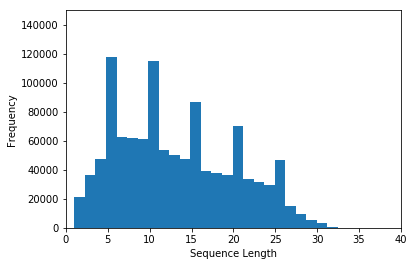

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(numWords, 50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 40, 0, 150000])
plt.show()

From the histogram as well as the average number of words per file, we can safely say that most reviews will fall under 250 words, which is the max sequence length value we will set. 

In [137]:
maxSeqLength = 25

Let's see how we can take a single file and transform it into our ids matrix. This is what one of the reviews looks like in text file format.

In [138]:
tw_train_pos_df.iloc[3, 5]

"cant sleep again tonight. hopefully my doctor(my 'dealer' u could say) will b nice 2mro. "

Now, let's convert to to an ids matrix

In [139]:
# Removes punctuation, parentheses, question marks, etc., and leaves only alphanumeric characters
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

In [140]:
firstFile = np.zeros((maxSeqLength), dtype='int32')

indexCounter = 0
line=tw_train_pos_df.iloc[3, 5]
cleanedLine = cleanSentences(line)
split = cleanedLine.split()
for word in split:
    try:
        firstFile[indexCounter] = wordsList.index(word)
    except ValueError:
        firstFile[indexCounter] = 399999 #Vector for unknown words
    indexCounter = indexCounter + 1
firstFile

array([ 52717,   4294,    378,   4385,   6199,    192, 399999,   5767,
         6479,     94,    203,     43,   1556,   3082, 399999,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0], dtype=int32)

Now, let's do the same for each of our 1120000 tw sentences. We'll load in the movie training set and integerize it to get a 1120000 x 15 matrix. This was a computationally expensive process, so instead of having you run the whole piece, we’re going to load in a pre-computed IDs matrix.

In [141]:
# ids = np.zeros((numFiles, maxSeqLength), dtype='int32')
# fileCounter = 0

# len_tw_train_pos_df = len(tw_train_pos_df)
# for index in range(0, len_tw_train_pos_df):
#     if index % 10000 == 0:
#         print("positive index:", index, " of", len_tw_train_pos_df)
#     indexCounter = 0
#     line = tw_train_pos_df.iloc[index, 5]
#     cleanedLine = cleanSentences(line)
#     split = cleanedLine.split()
#     for word in split:
#         try:
#             ids[fileCounter][indexCounter] = wordsList.index(word)
#         except ValueError:
#             ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
#         indexCounter = indexCounter + 1
#         if indexCounter >= maxSeqLength:
#             break
#     fileCounter = fileCounter + 1 

# len_tw_train_neg_df = len(tw_train_neg_df)
# for index in range(0, len_tw_train_neg_df):
#     if index % 10000 == 0:
#         print("negative index:", index, " of", len_tw_train_neg_df)
#     indexCounter = 0
#     line = tw_train_neg_df.iloc[index, 5]
#     cleanedLine = cleanSentences(line)
#     split = cleanedLine.split()
#     for word in split:
#         try:
#             ids[fileCounter][indexCounter] = wordsList.index(word)
#         except ValueError:
#             ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
#         indexCounter = indexCounter + 1
#         if indexCounter >= maxSeqLength:
#             break
#     fileCounter = fileCounter + 1 
# #Pass into embedding function and see if it evaluates. 

# np.save('idsMatrix', ids)

In [142]:
ids = np.load('idsMatrix.npy')

In [143]:
print(len(ids))

1120000


# Helper Functions

Below you can find a couple of helper functions that will be useful when training the network in a later step. 

In [144]:
#(0 = negative, 4 = positive)
print(len(tw_train_pos_df))

560137


In [145]:
print(len(tw_train_neg_df))

559863


In [146]:
print(len(ids))

1120000


In [147]:
from random import randint
#1120000
def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        if (i % 2 == 0): 
            num = randint(1,559137)
            labels.append([1,0])
        else:
            num = randint(561138, 1119999)
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(559137, 561137)
        if (num <= 560137):
            labels.append([1,0])
        else:
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

In [148]:
tw_train_df.head()

,0,1,2,3,4,5
0,4,1793776320,Thu May 14 03:57:15 PDT 2009,NO_QUERY,foozzy,"work to take some more pix, school, sushi?, th..."
1,4,1991549874,Mon Jun 01 07:14:28 PDT 2009,NO_QUERY,12Jansi,@dagira_tweets: Just to say a 'Hi' to Dave's c...
2,0,1833914530,Mon May 18 00:55:25 PDT 2009,NO_QUERY,Jimmy_Saunders,"@bswain Oh yeah, Mondays are the best"
3,0,1966305086,Fri May 29 17:31:16 PDT 2009,NO_QUERY,Yo_lin,follow friday.. follow me coz i only have 26 f...
4,4,1984814005,Sun May 31 15:51:41 PDT 2009,NO_QUERY,mmoorejones,Getting iPhone today Then movie with friends!


# RNN Model

Now, we’re ready to start creating our Tensorflow graph. We’ll first need to define some hyperparameters, such as batch size, number of LSTM units, number of output classes, and number of training iterations. 

In [149]:
batchSize = 24
lstmUnits = 64
numClasses = 2
iterations = 100000

As with most Tensorflow graphs, we’ll now need to specify two placeholders, one for the inputs into the network, and one for the labels. The most important part about defining these placeholders is understanding each of their dimensionalities. 

The labels placeholder represents a set of values, each either [1, 0] or [0, 1], depending on whether each training example is positive or negative. Each row in the integerized input placeholder represents the integerized representation of each training example that we include in our batch.

![caption](Images/SentimentAnalysis12.png)

In [150]:
import tensorflow as tf
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

Once we have our input data placeholder, we’re going to call the tf.nn.lookup() function in order to get our word vectors. The call to that function will return a 3-D Tensor of dimensionality batch size by max sequence length by word vector dimensions. In order to visualize this 3-D tensor, you can simply think of each data point in the integerized input tensor as the corresponding D dimensional vector that it refers to. 


![caption](Images/SentimentAnalysis13.png)

In [151]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

Now that we have the data in the format that we want, let’s look at how we can feed this input into an LSTM network. We’re going to call the tf.nn.rnn_cell.BasicLSTMCell function. This function takes in an integer for the number of LSTM units that we want. This is one of the hyperparameters that will take some tuning to figure out the optimal value. We’ll then wrap that LSTM cell in a dropout layer to help prevent the network from overfitting. 

Finally, we’ll feed both the LSTM cell and the 3-D tensor full of input data into a function called tf.nn.dynamic_rnn. This function is in charge of unrolling the whole network and creating a pathway for the data to flow through the RNN graph.

In [152]:
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

As a side note, another more advanced network architecture choice is to stack multiple LSTM cells on top of each other. This is where the final hidden state vector of the first LSTM feeds into the second. Stacking these cells is a great way to help the model retain more long term dependence information, but also introduces more parameters into the model, thus possibly increasing the training time, the need for additional training examples, and the chance of overfitting. For more information on how you can add stacked LSTMs to your model, check out Tensorflow's excellent [documentation](https://www.tensorflow.org/tutorials/recurrent#stacking_multiple_lstms).

The first output of the dynamic RNN function can be thought of as the last hidden state vector. This vector will be reshaped and then multiplied by a final weight matrix and a bias term to obtain the final output values.

In [153]:
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

Next, we’ll define correct prediction and accuracy metrics to track how the network is doing. The correct prediction formulation works by looking at the index of the maximum value of the 2 output values, and then seeing whether it matches with the training labels. 

In [154]:
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

We’ll define a standard cross entropy loss with a softmax layer put on top of the final prediction values. For the optimizer, we’ll use Adam and the default learning rate of .001. 

In [155]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer(learning_rate=0.0005).minimize(loss)

If you’d like to use Tensorboard to visualize the loss and accuracy values, you can also run and the modify the following code. 

In [156]:
import datetime

tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)

# Hyperparameter Tuning

Choosing the right values for your hyperparameters is a crucial part of training deep neural networks effectively. You'll find that your training loss curves can vary with your choice of optimizer (Adam, Adadelta, SGD, etc), learning rate, and network architecture. With RNNs and LSTMs in particular, some other important factors include the number of LSTM units and the size of the word vectors.

* Learning Rate: RNNs are infamous for being diffult to train because of the large number of time steps they have. Learning rate becomes extremely important since we don't want our weight values to fluctuate wildly as a result of a large learning rate, nor do we want a slow training process due to a low learning rate. The default value of 0.001 is a good place to start. You should increase this value if the training loss is changing very slowly, and decrease if the loss is unstable.  
* Optimizer: There isn't a consensus choice among researchers, but Adam has been widely popular due to having the adaptive learning rate property (Keep in mind that optimal learning rates can differ with the choice of optimizer).
* Number of LSTM units: This value is largely dependent on the average length of your input texts. While a greater number of units provides more expressibility for the model and allows the model to store more information for longer texts, the network will take longer to train and will be computationally expensive. 
* Word Vector Size: Dimensions for word vectors generally range from 50 to 300. A larger size means that the vector is able to encapsulate more information about the word, but you should also expect a more computationally expensive model. 

# Training

The basic idea of the training loop is that we first define a Tensorflow session. Then, we load in a batch of reviews and their associated labels. Next, we call the session’s `run` function. This function has two arguments. The first is called the "fetches" argument. It defines the value we’re interested in computing. We want our optimizer to be computed since that is the component that minimizes our loss function. The second argument is where we input our `feed_dict`. This data structure is where we provide inputs to all of our placeholders. We need to feed our batch of reviews and our batch of labels. This loop is then repeated for a set number of training iterations.

Instead of training the network in this notebook (which will take at least a couple of hours), we’ll load in a pretrained model.

If you decide to train this notebook on your own machine, note that you can track its progress using [TensorBoard](https://www.tensorflow.org/get_started/summaries_and_tensorboard). While the following cell is running, use your terminal to enter the directory that contains this notebook, enter `tensorboard --logdir=tensorboard`, and visit http://localhost:6006/ with a browser to keep an eye on your training progress.

In [157]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

for i in range(iterations):
   #Next Batch of reviews
   nextBatch, nextBatchLabels = getTrainBatch();
   sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels})
   
   #Write summary to Tensorboard
   if (i % 50 == 0):
       summary = sess.run(merged, {input_data: nextBatch, labels: nextBatchLabels})
       writer.add_summary(summary, i)

   #Save the network every 10,000 training iterations
   if (i % 10000 == 0 and i != 0):
        print("iteration: ", i, "of", iterations)
        save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
        print("saved to %s" % save_path)
writer.close()

iteration:  10000 of 100000
saved to models/pretrained_lstm.ckpt-10000
iteration:  20000 of 100000
saved to models/pretrained_lstm.ckpt-20000
iteration:  30000 of 100000
saved to models/pretrained_lstm.ckpt-30000
iteration:  40000 of 100000
saved to models/pretrained_lstm.ckpt-40000
iteration:  50000 of 100000
saved to models/pretrained_lstm.ckpt-50000
iteration:  60000 of 100000
saved to models/pretrained_lstm.ckpt-60000
iteration:  70000 of 100000
saved to models/pretrained_lstm.ckpt-70000
iteration:  80000 of 100000
saved to models/pretrained_lstm.ckpt-80000
iteration:  90000 of 100000
saved to models/pretrained_lstm.ckpt-90000


# Loading a Pretrained Model

Our pretrained model’s accuracy and loss curves during training can be found below. 

![caption](Images/SentimentAnalysis6.png)
![caption](Images/SentimentAnalysis7.png)

Looking at the training curves above, it seems that the model's training is going well. The loss is decreasing steadily, and the accuracy is approaching 100 percent. However, when analyzing training curves, we should also pay special attention to the possibility of our model overfitting the training dataset. Overfitting is a common phenomenon in machine learning where a model becomes so fit to the training data that it loses the ability to generalize to the test set. This means that training a network until you achieve 0 training loss might not be the best way to get an accurate model that performs well on data it has never seen before. Early stopping is an intuitive technique commonly used with LSTM networks to combat this issue. The basic idea is that we train the model on our training set, while also measuring its performance on the test set every now and again. Once the test error stops its steady decrease and begins to increase instead, you'll know to stop training, since this is a sign that the network has begun to overfit. 

Loading a pretrained model involves defining another Tensorflow session, creating a Saver object, and then using that object to call the restore function. This function takes into 2 arguments, one for the current session, and one for the name of the saved model. 

In [158]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('models'))

INFO:tensorflow:Restoring parameters from models/pretrained_lstm.ckpt-90000


Then we’ll load some movie reviews from our test set. Remember, these are reviews that the model has not been trained on and has never seen before. The accuracy for each test batch can be seen when you run the following code. 

In [159]:
iterations = 10
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    print("Accuracy for this batch:", (sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})) * 100)

Accuracy for this batch: 75.0
Accuracy for this batch: 75.0
Accuracy for this batch: 62.5
Accuracy for this batch: 87.5
Accuracy for this batch: 70.8333313465
Accuracy for this batch: 83.3333313465
Accuracy for this batch: 91.6666686535
Accuracy for this batch: 83.3333313465
Accuracy for this batch: 79.1666686535
Accuracy for this batch: 83.3333313465


# Conclusion

In this notebook, we went over a deep learning approach to sentiment analysis. We looked at the different components involved in the whole pipeline and then looked at the process of writing Tensorflow code to implement the model in practice. Finally, we trained and tested the model so that it is able to classify movie reviews.

With the help of Tensorflow, you can create your own sentiment classifiers to understand the large amounts of natural language in the world, and use the results to form actionable insights. Thanks for reading and following along!